# Customer Segmentation with k-means

## Faizan Hameed

In [68]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:

#changing the working directory
%cd /content/gdrive/My Drive/Datasets

/content/gdrive/My Drive/Datasets


#### 1- Importing required modules

In [70]:
#Importing some basic libraries. We will import other libraries as per requirement
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### 2-Loading the data

In [71]:

df = pd.read_csv('Mall_Customers_Segmentation.csv') #Importing dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### 3-Preprocessing the Data

In [72]:
df.drop(columns=['CustomerID'],axis = 1, inplace = True)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6


In [73]:
df.shape

(200, 4)

In [74]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [75]:
df.rename(columns = {'Gender':'M/F'}, inplace = True)
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['M/F'])
df.drop(columns=['M/F'],axis=1,inplace = True)
df

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [76]:
# We want to replace missing values i.e "?" with "NaN"
df.replace("?", np.nan, inplace = True)
df.isnull().sum() #Checking the nul values

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender                    0
dtype: int64

In [77]:
df.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
Gender                    int64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender                  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [79]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


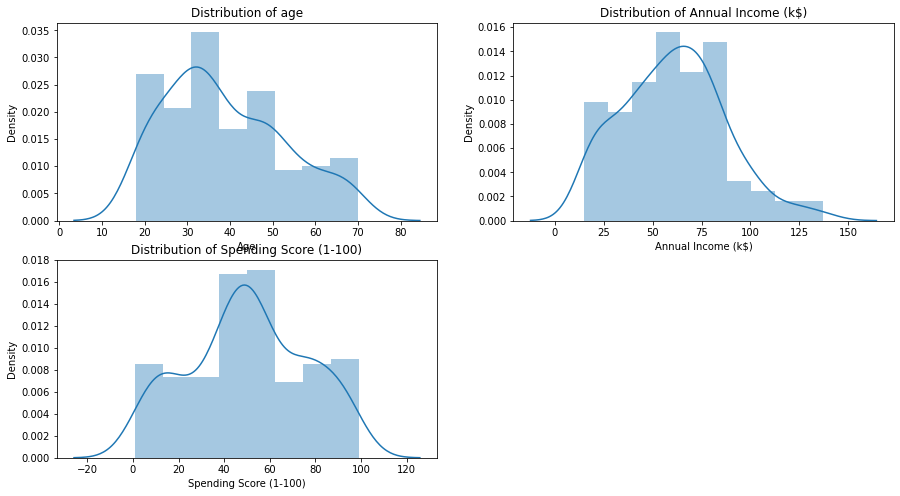

In [80]:
# Distribution Plots


plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])
plt.title("Distribution of age")
plt.subplot(2,2,2)
sns.distplot(df['Annual Income (k$)'])
plt.title("Distribution of Annual Income (k$)")
plt.subplot(2,2,3)
sns.distplot(df['Spending Score (1-100)'])
plt.title("Distribution of Spending Score (1-100)")
plt.show()

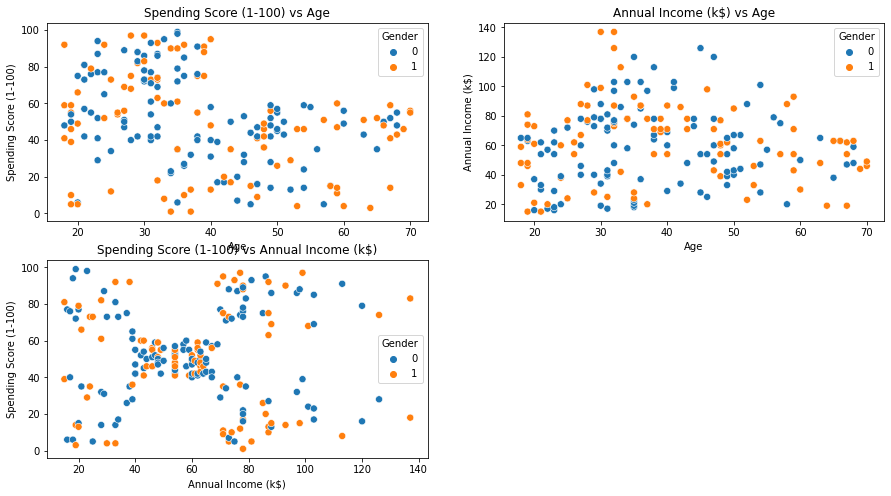

In [81]:
#Scatter plots between different variables
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], data = df, s = 50,hue='Gender')
plt.title("Spending Score (1-100) vs Age")

plt.subplot(2,2,2)
sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'], data = df, s = 50,hue='Gender')
plt.title("Annual Income (k$) vs Age")

plt.subplot(2,2,3)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], data = df, s = 50,hue='Gender')
plt.title("Spending Score (1-100) vs Annual Income (k$)")
plt.show()

#### 4-Building the model

In [82]:
#Making different dataframe having different variables, for analysis and k_means clustering.
df_ag_ss=df[['Age','Spending Score (1-100)']]# Dataframe for clustering based on "Age" and "Spending Score(1-100)" variables
df_ag_ai=df[['Age','Annual Income (k$)']]# Dataframe for clustering based on "Age" and "Anual Income(k$)" variables
df_ai_ss=df[['Annual Income (k$)','Spending Score (1-100)']]#Dataframe for clustering based on "Anual Income (k$)" and "Spending Score(1-100)" variables

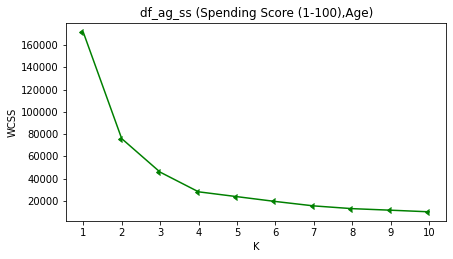

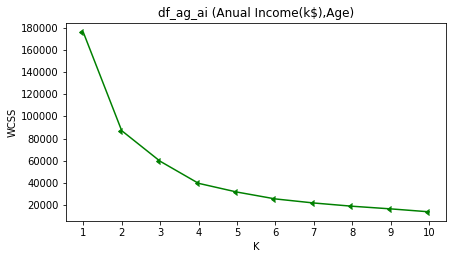

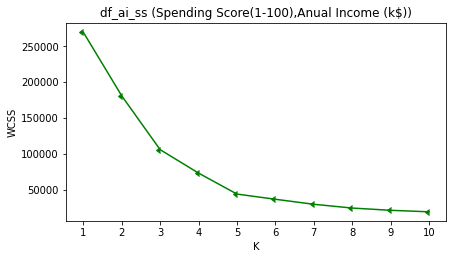

In [83]:
# K values for these dataframes
x=0
y=0
for i in range(1, 4):
  plt.figure(figsize=(15,8))
  plt.subplot(2, 2, i)
  a=[df_ag_ss,df_ag_ai,df_ai_ss] #list of dataframe (having different variable's combinations) as in the cell above
  b=['df_ag_ss (Spending Score (1-100),Age)','df_ag_ai (Anual Income(k$),Age)','df_ai_ss (Spending Score(1-100),Anual Income (k$))']#List of titles
  wcss =[] #Within Cluster for Sum of Squared Errors (WCSS)
  for i in range(1,11):
      k_mean = KMeans(n_clusters=i)
      k_mean.fit(a[x])
      wcss.append(k_mean.inertia_)   

  #plotting elbow curve
  plt.plot(range(1,11), wcss, color="Green", marker=8)
  plt.title(b[y])
  plt.xlabel("K")
  plt.xticks(range(1,11,1))
  plt.ylabel("WCSS")
  x+=1
  y+=1

In [84]:
# For 'df_ag_ss' we are taking 4 clusters i.e n_clusters=4
k_mean1 = KMeans(n_clusters=4)
k_mean1.fit(df_ag_ss)
# For 'df_ag_ai' we are taking 4 clusters i.e n_clusters=4
k_mean2 = KMeans(n_clusters=4)
k_mean2.fit(df_ag_ai)
# For 'df_ai_ss' we are taking 5 clusters i.e n_clusters=5
k_mean3 = KMeans(n_clusters=5)
k_mean3.fit(df_ai_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 6- Model Evaluation and Predictions

Generally we use K means clustering algorithms to make two types of predictions.
1.   Which cluster each data point belongs to
2.   Where the center of each cluster is

In [85]:
#Predict which cluster each data point belongs to
print("For each data point of 'df_ag_ss' the predicted cluster is: \n",k_mean1.labels_)
print()
print("For each data point of 'df_ag_ai' the predicted cluster is:\n ",k_mean2.labels_)
print()
print("For each data point of 'df_ai_ss' the predicted cluster is:\n ",k_mean3.labels_)

For each data point of 'df_ag_ss' the predicted cluster is: 
 [1 3 2 3 1 3 2 3 2 3 2 3 2 3 2 3 1 1 2 3 1 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2
 3 2 3 0 3 0 1 2 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 3 1 3 0 3 2 3 2 3 1 3 2 3 2 3 2 3 2 3 1 3 2 3 0 3
 2 3 2 3 2 3 2 3 2 3 2 3 0 3 2 3 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 1
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3]

For each data point of 'df_ag_ai' the predicted cluster is:
  [2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

For each data point of 'df_ai_ss' the predicted cluster is:


In [86]:
#Checking where the center of each cluster lies
#It generates a two-dimensional NumPy array that contains the coordinates of each clusters center
print("For 'df_ag_ss' the center of each cluster lies at:  \n",k_mean1.cluster_centers_)
print()
print("For 'df_ag_ai' the center of each cluster lies at:  \n",k_mean2.cluster_centers_)
print()
print("For 'df_ai_ss' the center of each cluster lies at:  \n",k_mean3.cluster_centers_)

For 'df_ag_ss' the center of each cluster lies at:  
 [[55.70833333 48.22916667]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]]

For 'df_ag_ai' the center of each cluster lies at:  
 [[ 55.81481481  51.77777778]
 [ 31.95890411  72.95890411]
 [ 30.34693878  29.26530612]
 [ 39.         106.5       ]]

For 'df_ai_ss' the center of each cluster lies at:  
 [[55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]


In [87]:
#prediction with first model
pred1 = k_mean1.predict(df_ag_ss)
df_ag_ss['cluster'] = pred1
#prediction with second model
pred2 = k_mean2.predict(df_ag_ai)
df_ag_ai['cluster'] = pred2
#prediction with third model
pred3 = k_mean3.predict(df_ai_ss)
df_ai_ss['cluster'] = pred3

print('df_ag_ss:   \n',df_ag_ss.head(5))
print("-------------------------------------")
print('df_ag_ai:   \n',df_ag_ai.head(5))
print("-------------------------------------")
print('df_ai_ss:   \n',df_ai_ss.head(5))


df_ag_ss:   
    Age  Spending Score (1-100)  cluster
0   19                      39        1
1   21                      81        3
2   20                       6        2
3   23                      77        3
4   31                      40        1
-------------------------------------
df_ag_ai:   
    Age  Annual Income (k$)  cluster
0   19                  15        2
1   21                  15        2
2   20                  16        2
3   23                  16        2
4   31                  17        2
-------------------------------------
df_ai_ss:   
    Annual Income (k$)  Spending Score (1-100)  cluster
0                  15                      39        1
1                  15                      81        4
2                  16                       6        1
3                  16                      77        4
4                  17                      40        1


In [88]:
#different clusters in each dataframe
print(f"df_ai_ss uniqu values:  {df_ai_ss.cluster.unique()}")
print(f'df_ag_ai unique values:  {df_ag_ai.cluster.unique()}')
print(f"df_ag_ss  unique values:  {df_ag_ss.cluster.unique()}")

df_ai_ss uniqu values:  [1 4 0 2 3]
df_ag_ai unique values:  [2 0 1 3]
df_ag_ss  unique values:  [1 3 2 0]


In [89]:
#Defining a function to plot the graphs of clusters
def plot_it(a,b,k,df):
  plt.figure(figsize=(6,3))
  if k == 5:
    sns.scatterplot(x = df[a],y = df[b],hue="cluster", 
    palette=['orange','black','red','green','brown'], legend='full',data = df  ,s = 50 )
    plt.xlabel(a)
    plt.ylabel(b) 
    plt.title(f" {a} vs {b}")
  elif k == 4:
    sns.scatterplot(x = df[a],y = df[b],hue="cluster", 
    palette=['orange','black','red','green'], legend='full',data = df  ,s = 50 )#We can write "palette=sns.color_palette('hls', 4)"
    plt.xlabel(a)
    plt.ylabel(b) 
    plt.title(f" {a} vs {b}")
  else:
    print('Value of k is incorrect!')

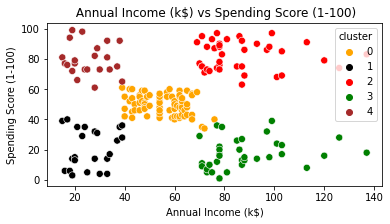

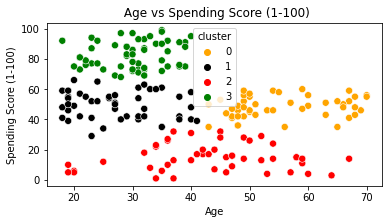

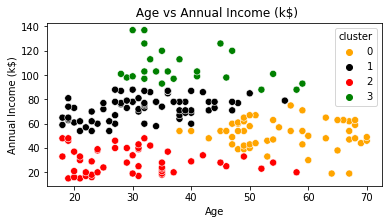

In [90]:
#Plotting the graphs. We will take the value of k same as we took from elbow graph
plot_it('Annual Income (k$)','Spending Score (1-100)',5,df_ai_ss)#Plotting clusters based on "Anual Income (k$)" and "Spending Score(1-100)" variables
plot_it('Age','Spending Score (1-100)',4,df_ag_ss)#Plotting clusters based on "Age" and "Spending Score(1-100)" variables
plot_it('Age','Annual Income (k$)',4,df_ag_ai)#Plotting clusters based on "Age" and "Anual Income(k$)" variables

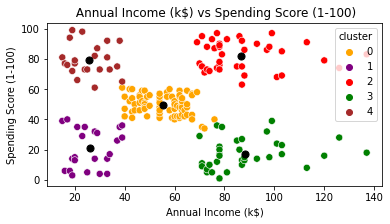

In [91]:
#defining function for plotting the centroids of clusters (for 'df_ai_ss')
def plot_it(a,b,df):
  plt.figure(figsize=(6,3))
  sns.scatterplot(x = df[a],y = df[b],hue="cluster", 
  palette=['orange','purple','red','green','brown'], legend='full',data = df  ,s = 50 )
  plt.scatter(k_mean3.cluster_centers_[:,0], k_mean3.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid') #plot the centroids
  plt.xlabel(a)
  plt.ylabel(b) 
  plt.title(f" {a} vs {b}")
    
#Plotting the centroids of clusters(for 'df_ai_ss' dataframe)
plot_it('Annual Income (k$)','Spending Score (1-100)',df_ai_ss)
#Dots in black colours are centroids

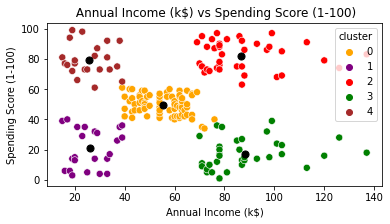

In [92]:
#Plotting the centroids of clusters(for 'df_ai_ss' dataframe)
plot_it('Annual Income (k$)','Spending Score (1-100)',df_ai_ss)
#Dots in black colours are centroids
#We can also plot the centroid for other dataframes

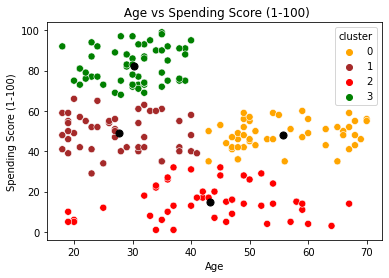

In [93]:
#Plotting the centroids of clusters (for 'df_ag_ss')
def plot_it(a,b,df):
  sns.scatterplot(x = df[a],y = df[b],hue="cluster", 
  palette=['orange','brown','red','green'], legend='full',data = df  ,s = 50 )#We can write "palette=sns.color_palette('hls', 4)"
  plt.scatter(k_mean1.cluster_centers_[:,0], k_mean1.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')
  plt.xlabel(a)
  plt.ylabel(b) 
  plt.title(f" {a} vs {b}")

plot_it('Age','Spending Score (1-100)',df_ag_ss)


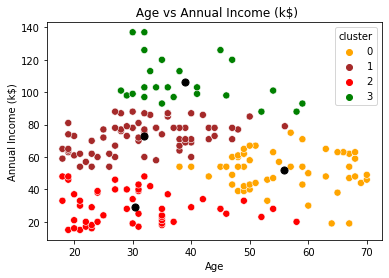

In [94]:
#Plotting the centroids of clusters (for 'df_ag_ai')
def plot_it(a,b,df):
  sns.scatterplot(x = df[a],y = df[b],hue="cluster", 
  palette=['orange','brown','red','green'], legend='full',data = df  ,s = 50 )#We can write "palette=sns.color_palette('hls', 4)"
  plt.scatter(k_mean2.cluster_centers_[:,0], k_mean2.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'centeroid')
  plt.xlabel(a)
  plt.ylabel(b) 
  plt.title(f" {a} vs {b}")
plot_it('Age','Annual Income (k$)',df_ag_ai)